In [1]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
from scipy import sparse
import scipy
from utils import lossfunc as lf

import sys
sys.path.append('..')

In [2]:
from utils import functions as f

In [3]:
L = 6

Sz = np.zeros([2,2])
Sz[0,0] = 1/2
Sz[1,1] = -1/2
Sx = np.zeros([2,2])
Sx[1,0] = 1/2
Sx[0,1] = 1/2
Sy = np.zeros([2,2], dtype=np.complex64)
Sy[1,0] = 1j/2
Sy[0,1] = -1j/2


SzSz = np.kron(Sz,Sz).astype(np.float64)
SxSx = np.kron(Sx,Sx).astype(np.float64)
SySy = np.kron(Sy,Sy).astype(np.float64)

lh = SzSz + SxSx + SySy
# lh = - lh


LH_ = sparse.csr_matrix((2**3,2**3), dtype = np.float64)
i = 0
LH_ += f.l2nl(lh/2, 3, [0, 1], sps = 2)
LH_ += f.l2nl(lh/2, 3, [0, 2], sps = 2)
LH_ += f.l2nl(lh/2, 3, [1, 2], sps = 2)

/home/keisuke/miniconda3/envs/quspin/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [6]:
ls ..

array/                    heisernberg.ipynb  readme.txt
array.txt                 ladder.ipynb       shastry_exact.py
check_conn_from_index.py  make_local/        simple_4site_model.ipynb
check_conn.py             MC.ipynb           SS_hamiltonian.ipynb
fordebug/                 nsp/               test.py
functions_old.py          __pycache__/       visualize.ipynb


### exact diagonalization with original matrix

In [7]:
f

<module 'utils.functions' from '/home/keisuke/worms/python/nsp/utils/functions.py'>

In [8]:
from importlib import reload
from scipy import sparse
import scipy.sparse.linalg
import scipy
reload(f)
L = 6
H = sparse.csr_matrix((2**L, 2**L), dtype=np.float64)
for i in range(L):
    
    H += f.l2nl(lh, L, [i,(i+1)%L], sps = 2)
    H += f.l2nl(lh/2, L, [i,(i+2)%L], sps = 2)   

E, V = np.linalg.eigh(H.toarray())
print(E)

[-2.25000000e+00 -2.25000000e+00 -1.75000000e+00 -1.75000000e+00
 -1.75000000e+00 -1.56872930e+00 -1.56872930e+00 -1.56872930e+00
 -1.56872930e+00 -1.56872930e+00 -1.56872930e+00 -1.25000000e+00
 -1.25000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -2.50000000e-01
 -2.50000000e-01 -2.50000000e-01 -2.50000000e-01 -2.50000000e-01
 -2.50000000e-01 -5.74378323e-16 -3.74386533e-16 -2.56020317e-16
 -1.08727260e-16 -9.39622451e-17 -8.72558660e-18  1.85935954e-17
  1.24795511e-16  1.71593828e-16  1.74052791e-16  2.50000000e-01
  2.50000000e-01  2.50000000e-01  2.50000000e-01  2.50000000e-01
  2.50000000e-01  3.18729304e-01  3.18729304e-01  3.18729304e-01
  3.18729304e-01  3.18729304e-01  3.18729304e-01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  2.25000000e+00  2.25000000e+00  2.25000000e+00
  2.25000000e+00  2.25000

/home/keisuke/miniconda3/envs/quspin/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


## Thermodynamical Properties

In [10]:
beta = 1
Z = np.exp(-beta*E).sum()
EZ = (E*np.exp(-beta*E)).sum()
EZ/Z

-1.1478481848393933

### rewritten with projection operators

In [11]:
LH = sparse.csr_matrix((2**3,2**3), dtype = np.float64)
i = 0
LH += f.l2nl(lh/2, 3, [i,(i+1)%L], sps = 2)
LH += f.l2nl(lh/2, 3, [(i+1)%L,(i+2)%L], sps = 2)
LH += f.l2nl(lh/2, 3, [i,(i+2)%L], sps = 2) 
LH = LH

In [12]:
LH_ = sparse.csr_matrix((2**3,2**3), dtype = np.float64)
i = 0
LH_ += f.l2nl(lh/2, 3, [0, 1], sps = 2)
LH_ += f.l2nl(lh/2, 3, [0, 2], sps = 2)
LH_ += f.l2nl(lh/2, 3, [1, 2], sps = 2)



LH = sparse.csr_matrix((2**6,2**6), dtype = np.float64)
LH += f.l2nl(LH_/2, 6, [0, 1, 2], sps = 2)
LH += f.l2nl(LH_, 6, [1, 2, 3], sps = 2)
LH += f.l2nl(LH_, 6, [2, 3, 4], sps = 2)
LH += f.l2nl(LH_/2, 6, [3, 4, 5], sps = 2)

H = sparse.csr_matrix((2**6,2**6), dtype = np.float64)
H += f.l2nl(LH, 2, [0, 1], sps = 8)
H += f.l2nl(LH, 2, [1, 0], sps = 8)

LH2 = f.l2nl(LH, 2, [1, 0], sps = 8)
X = -H.toarray()
X1 = -LH.toarray()
X2 = -LH2.toarray()

In [87]:
2**12

4096

In [91]:
H2 = sparse.csr_matrix((2**12,2**12), dtype = np.float64)
H2 += f.l2nl(LH, 4, [0, 1], sps = 8)
H2 += f.l2nl(LH, 4, [1, 2], sps = 8)

/home/keisuke/miniconda3/envs/quspin/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [92]:
X = -(H2).toarray()
np.linalg.eigvals(X)

array([-2.25+0.j, -2.25+0.j, -2.25+0.j, ..., -2.25+0.j, -2.25+0.j,
       -2.25+0.j])

In [94]:
Y = -(LH).toarray()
np.linalg.eigvals(Y)

array([ 0.648, -0.354, -1.125, -0.75 , -0.919, -1.125, -1.125, -0.616,
       -0.616, -1.125, -1.125, -0.125, -0.616, -0.919, -0.919, -0.919,
       -0.919, -0.75 , -0.75 , -0.75 , -0.75 , -0.209, -0.209, -0.209,
       -0.163, -0.163, -0.163,  0.891,  0.926,  0.926,  0.926,  0.891,
        0.891, -0.354, -0.354, -0.354, -0.354,  0.434,  0.434,  0.362,
        0.362,  0.362,  0.434,  1.125,  0.648,  0.648,  0.648,  0.648,
        0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  1.125,  1.125,  1.125,
        1.125,  0.625,  0.625,  0.625,  0.625,  0.625, -1.125, -1.125])

In [37]:
XX = -H2.toarray()
XX2 = H2_.toarray()

In [11]:
from utils import lossfunc as lf
reload(lf)
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1)+lf.make_positive_np(X2))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X))[-1]
print(E1, E2)

3.3736516671379335 3.3736516671379335


### dual annealing

In [12]:
def callbackF(x, f, context):
    print("target value : {:.5f} in the context {}".format(f,context))

In [31]:
from utils import optm
from utils import lossfunc
reload(optm)
reload(lossfunc)
# X = np.stack([X1_prime, X2_prime])
func = optm.unitary_optm([XX], 28, add=True, N = 3)
import scipy.optimize as optimize
bounds = [[10, 100] for _ in range(28)]
ret = optimize.dual_annealing(func, bounds = bounds, restart_temp_ratio = 1e-5, visit = 2.7, initial_temp = 10**3, maxiter = 100, callback = callbackF)


! ---- diagonal elements of the local hamiltonian should be non negative ---- !
8 3
target value : 11.47950 in the context 0
target value : 11.18224 in the context 0
target value : 11.13347 in the context 0
target value : 11.10018 in the context 0
target value : 10.81201 in the context 0
target value : 10.45482 in the context 0
target value : 10.45191 in the context 0
target value : 10.39631 in the context 0
target value : 10.20844 in the context 0
target value : 9.69565 in the context 0
target value : 4.76895 in the context 1


In [38]:
np.linalg.eigvalsh(XX2)[-1]

4.768950917705867

In [14]:
func(ret.x)
X1_ = func.U @ X1 @ func.U.T
X2_ = func.U @ X2 @ func.U.T
X_ = func.U @ X @ func.U.T
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1_)+lf.make_positive_np(X2_))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X_))[-1]
print(E1, E2)

NameError: name 'func' is not defined

### gradient descent

In [41]:
from utils import optm
import torch.optim
reload(optm)
model, gl = optm.optim_matrix_symm([torch.tensor(XX)], 10000, optm_method = torch.optim.SGD, seed = 10, lr = 0.001, add = False, N = 3)

! ---- diagonal elements of the local hamiltonian should be non negative ---- !
target loss : 3.232
loss before optm : 4.7689509177

---------- iteration start ----------
iteration :        0   loss : 11.349
iteration :     1000   loss : 8.754
iteration :     2000   loss : 6.759
iteration :     3000   loss : 6.303
iteration :     4000   loss : 5.926
iteration :     5000   loss : 5.532
iteration :     6000   loss : 4.779
iteration :     7000   loss : 4.781
iteration :     8000   loss : 4.780
iteration :     9000   loss : 4.780

 -------------- results --------------
target loss      : 3.2316287937
loss before optm : 4.7987576602
loss after optm  : 4.8113853127


In [52]:
func(ret.x)
U = np.array(model.matrix.data)
X1_ = U @ X1 @ U.T
X2_ = U @ X2 @ U.T
X_ = U @ X @ U.T
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1_)+lf.make_positive_np(X2_))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X_))[-1]
print(E1, E2)

3.1330417318092953 2.891255499117778


In [72]:
(2**9) ** (1/3)

7.999999999999999

In [112]:
from utils import optm
import torch.optim
reload(optm)
model, gl = optm.optim_matrix_symm([torch.tensor(X)], 10000, optm_method = torch.optim.SGD, seed = 10, lr = 0.001, add = True)

target loss : 2.250

---------- iteration start ----------
iteration :    0   loss : 20.031
iteration : 1000   loss : 19.706
iteration : 2000   loss : 19.703
iteration : 3000   loss : 19.699
iteration : 4000   loss : 19.704
iteration : 5000   loss : 19.699
iteration : 6000   loss : 19.701
iteration : 7000   loss : 19.707
iteration : 8000   loss : 19.705
iteration : 9000   loss : 19.702

 -------------- results --------------
target loss      : 2.2500000000
loss before optm : 2.8182674076
loss after optm  : 2.6929198104


### another cost function

minimize $\langle \psi ^ + \vert H^+ \vert \psi ^ + \rangle$ 

In [268]:
X_prime = torch.tensor(X)
X_prime = X_prime[None, :, :]

/Users/keisukemurota/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [247]:
reload(optm)
solver = optm.unitary_solver2(X, [8,8], True)

In [248]:
for t in range(10**4):
    optimizer = torch.optim.SGD(solver.parameters(), lr = 0.001)
    M, V = solver()
    loss_ = optm.loss_2(M,V)
    optimizer.zero_grad()
    loss_.backward()
    if (t % 1000) == 0:
        print("iteration : {:4d}   loss : {:.3f}".format(t,loss_.item()))
    optimizer.step()

iteration :    0   loss : 17.725
iteration : 1000   loss : 11.772
iteration : 2000   loss : 11.426
iteration : 3000   loss : 11.365
iteration : 4000   loss : 11.361
iteration : 5000   loss : 11.359
iteration : 6000   loss : 11.357
iteration : 7000   loss : 11.357
iteration : 8000   loss : 11.357
iteration : 9000   loss : 11.358


## test several optimization scheme

$\lambda_i$ is the eigenvalues of $(UHU^T)^+$
$$
E = \max(\lambda_i) \\
w_{k+1} = w_k - \alpha \cdot \gamma \cdot \text{sign}(\partial E / \partial w_k)
$$

In [60]:
from utils import optm_method as optmm
reload(optm)
reload(optmm)

<module 'utils.optm_method' from '/home/keisuke/worms/python/nsp/utils/optm_method.py'>

In [47]:
reload(optm)
import torch.optim
model, gl = optm.optim_matrix_symm(
        [torch.tensor(XX)],
        40000, 
        optm_method = optm.scheme1, 
        add = True,
        N = 3,
        init_params = model.params.data,
        gamma = 0.0001,
        r = 1,
        )

add all matrix after positive map
! ---- diagonal elements of the local hamiltonian should be non negative ---- !
target loss : 3.232
loss before optm : 4.7689509177

---------- iteration start ----------
iteration :        0   loss : 4.780	gamma = 0.0001


/home/keisuke/worms/python/nsp/utils/optm.py:422: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model._params = torch.nn.Parameter(torch.tensor(init_params))


iteration :     1000   loss : 4.771	gamma = 0.0001
iteration :     2000   loss : 4.772	gamma = 0.0001
iteration :     3000   loss : 4.770	gamma = 0.0001
iteration :     4000   loss : 4.771	gamma = 0.0001
iteration :     5000   loss : 4.771	gamma = 0.0001
iteration :     6000   loss : 4.771	gamma = 0.0001
iteration :     7000   loss : 4.771	gamma = 0.0001
iteration :     8000   loss : 4.771	gamma = 0.0001
iteration :     9000   loss : 4.771	gamma = 0.0001


KeyboardInterrupt: 

In [61]:
model(torch.tensor(X1))

tensor([[[-1.1249e+00,  5.7433e-04, -2.0622e-03,  ..., -2.6068e-04,
           1.8573e-03,  1.4738e-04],
         [ 5.7433e-04, -3.7621e-01, -3.8972e-05,  ..., -9.8915e-05,
           1.2528e-01, -1.2440e-01],
         [-2.0622e-03, -3.8972e-05, -1.2500e-01,  ...,  1.2482e-01,
          -5.9196e-04,  4.1393e-04],
         ...,
         [-2.6068e-04, -9.8915e-05,  1.2482e-01,  ...,  2.5081e-03,
           1.4832e-03, -4.6849e-04],
         [ 1.8573e-03,  1.2528e-01, -5.9196e-04,  ...,  1.4832e-03,
          -3.6737e-03,  1.2713e-01],
         [ 1.4738e-04, -1.2440e-01,  4.1393e-04,  ..., -4.6849e-04,
           1.2713e-01, -2.5187e-01]]], dtype=torch.float64,
       grad_fn=<UnsafeViewBackward0>)

In [69]:
np.array(model.matrix.data) @ X1 @ np.array(model.matrix.data).T - np.array(model(torch.tensor(X1)).data)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [70]:
reload(optm)
import torch.optim
model, gl = optm.optim_matrix_symm(
        [torch.tensor(X)],
        10000, 
        optm_method = optm.scheme1, 
        add = True,
#         seed = 10,
        gamma = 0.001,
        r = 1,
        )

add all matrix after positive map
! ---- diagonal elements of the local hamiltonian should be non negative ---- !
target loss : 2.250
loss before optm : 3.3736516671

---------- iteration start ----------
iteration :        0   loss : 6.657	gamma = 0.001
iteration :     1000   loss : 2.643	gamma = 0.001
iteration :     2000   loss : 2.515	gamma = 0.001
iteration :     3000   loss : 2.517	gamma = 0.001
iteration :     4000   loss : 2.518	gamma = 0.001
iteration :     5000   loss : 2.515	gamma = 0.001
iteration :     6000   loss : 2.516	gamma = 0.001
iteration :     7000   loss : 2.517	gamma = 0.001
iteration :     8000   loss : 2.516	gamma = 0.001
iteration :     9000   loss : 2.516	gamma = 0.001

 -------------- results --------------
target loss      : 2.2500000000
loss before optm : 3.4361406616
loss after optm  : 2.8780380129


In [57]:
U = np.array(model.matrix.data)
X1_ = U @ X1 @ U.T
X2_ = U @ X2 @ U.T
X_ = U @ X @ U.T
E1 = np.linalg.eigvalsh(lf.make_positive_np(X1_)+lf.make_positive_np(X2_))[-1]
E2 = np.linalg.eigvalsh(lf.make_positive_np(X_))[-1]
print(E1, E2)

4.074062871639318 2.5194723775016445


In [57]:
U = np.array(model.matrix.data)

H2_ = sparse.csr_matrix((2**9,2**9), dtype = np.float64)
H2_ += f.l2nl(lf.make_positive_np(-(U@LH.toarray()@U.T)), 3, [0, 1], sps = 8)
H2_ += f.l2nl(lf.make_positive_np(-(U@LH.toarray()@U.T)), 3, [1, 2], sps = 8)
H2_ += f.l2nl(lf.make_positive_np(-(U@LH.toarray()@U.T)), 3, [2, 0], sps = 8)

H2 = sparse.csr_matrix((2**6,2**6), dtype = np.float64)
H2 += f.l2nl(LH, 3, [0, 1], sps = 8)
H2 += f.l2nl(LH, 3, [1, 2], sps = 8)
H2 += f.l2nl(LH, 3, [2, 0], sps = 8)

/home/keisuke/miniconda3/envs/quspin/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [60]:
np.linalg.eigvalsh(-H2.toarray())

array([-3.375, -3.375, -3.375, -3.375, -3.375, -3.375, -3.375, -3.375,
       -3.375, -3.375, -2.728, -2.728, -2.728, -2.728, -2.728, -2.728,
       -2.728, -2.728, -2.728, -2.728, -2.728, -2.728, -2.728, -2.728,
       -2.728, -2.728, -2.274, -2.274, -2.274, -2.274, -2.274, -2.274,
       -2.274, -2.274, -2.274, -2.274, -2.274, -2.274, -2.003, -2.003,
       -2.003, -2.003, -2.003, -2.003, -2.003, -2.003, -1.918, -1.918,
       -1.918, -1.918, -1.901, -1.901, -1.901, -1.901, -1.901, -1.901,
       -1.622, -1.622, -1.622, -1.622, -1.622, -1.622, -1.622, -1.622,
       -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579,
       -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579, -1.579,
       -1.534, -1.534, -1.534, -1.534, -1.534, -1.534, -1.534, -1.534,
       -1.534, -1.534, -1.534, -1.534, -1.318, -1.318, -1.318, -1.318,
       -1.318, -1.318, -1.318, -1.318, -1.318, -1.318, -1.318, -1.318,
       -1.318, -1.318, -1.318, -1.318, -1.29 , -1.29 , -1.29 , -1.29 ,
      

## gridsearch revisit

In [272]:
from utils import optm
from utils import optm_method as optmm
reload(optm)
reload(optmm)

<module 'utils.optm_method' from '/Users/keisukemurota/Documents/todo/worms/python/nsp/utils/optm_method.py'>

In [279]:
n_index = 4
ranges = (slice(-10, 10), ) * n_index
index = np.random.choice(28, n_index, replace=True)
grid = optm.unitary_optm(X, 28, index=index, init_param = np.array(model._params.data))

In [280]:
import scipy.optimize

for _ in range(100):
    resbrute = scipy.optimize.brute(grid, ranges = ranges, full_output=True)
    index = np.random.choice(28, n_index , replace=True)
#     print(resbrute[0])
    print("target {:.4f}".format(resbrute[1]))
#     print(grid.params)
    grid = optm.unitary_optm(X, 28, index=index, init_param = grid.params)

KeyboardInterrupt: 

In [127]:
index

array([ 9, 21,  1])

In [254]:
grid([0])

4.761640719693298

In [257]:
T = np.linspace(-100,100, 1000)
y = []
grid = optm.unitary_optm(X, 28, index=index, init_param = np.array(model._params.data))
for t in T:
    y.append(grid([t*np.pi+250]))

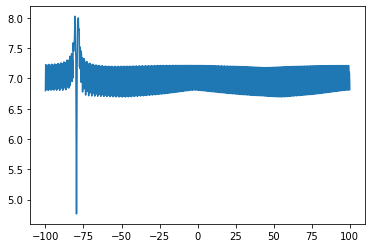

In [258]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(T,y)

In [194]:
grid.params[grid.index]

array([248630.97], dtype=float32)

In [68]:
resbrute

array([4.34404299e+00, 5.78362881e-04, 3.21762196e+00])

In [199]:
np.linalg.eigvalsh(grid.generators[0])

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [100]:
def exp_energy(E, beta):
    Z = np.exp(-beta*E)
    EZ = E*Z
    return np.sum(EZ)/np.sum(Z)

In [190]:
X = np.load("../array/MG_union_bond.npy")

In [191]:
# X = f.set_origin(X)

In [192]:
# X += 0.1*np.eye(X.shape[0])

In [197]:
Y = lf.positive_map_np(X) / 1.5

In [198]:
np.save("../array/MG_union_abs.npy",Y)
np.save("../array/MG_union_bond_mod.npy", X)

In [199]:
L = 2
H = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H += f.l2nl(X, L, [i, (i+1)%L], sps = 8)    
    
H_abs = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H_abs += f.l2nl(Y, L, [i, (i+1)%L], sps = 8) 

In [200]:
np.linalg.eigvalsh(H_abs)[-1] / np.linalg.eigvalsh(H)[-1]

0.9996004939667935

In [201]:
E_abs = np.linalg.eigvalsh(H_abs)
E= np.linalg.eigvalsh(H)
exp_energy(E_abs, -1/0.2)

2.1476951995419356

In [202]:
exp_energy(E, -1/1)

1.1478481848393938

In [203]:
T = 0.3
beta=1/T
np.exp(beta*E).sum() / np.exp(beta*E_abs).sum()

2.0128533510410778

In [204]:
E

array([-2.25000000e+00, -2.25000000e+00, -2.25000000e+00, -2.25000000e+00,
       -2.25000000e+00, -2.25000000e+00, -2.25000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -3.18729304e-01, -3.18729304e-01, -3.18729304e-01,
       -3.18729304e-01, -3.18729304e-01, -3.18729304e-01, -2.50000000e-01,
       -2.50000000e-01, -2.50000000e-01, -2.50000000e-01, -2.50000000e-01,
       -2.50000000e-01, -3.34820944e-16, -3.14925965e-16, -1.98312477e-16,
       -1.62078241e-16, -7.96990183e-17,  6.25359746e-17,  8.48188160e-17,
        1.56612853e-16,  2.38330387e-16,  4.27139659e-16,  2.50000000e-01,
        2.50000000e-01,  2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
        2.50000000e-01,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.25000000e+00,
        1.25000000e+00,  

In [200]:
E, V = np.linalg.eigh(X1)
E2, V2 = np.linalg.eigh(H)
E3, V3 = np.linalg.eig(V[:,-5:].T @ (H @ V[:,-5:]))

In [201]:
L = 4
H2 = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H2 += f.l2nl(X1, L, [i, (i+1)%L], sps = 8)    

In [203]:
phi_tmp = np.kron(V2[:,-1], V2[:,-1])

In [204]:
v = np.array([0, 1, -1, 0])
v = v / np.linalg.norm(v)
v_ = np.kron(v,v)
v = np.kron(v_,v)
phi_tmp = np.kron(v, v)
phi_tmp @ H2 @ phi_tmp

0.7159772618674878

In [211]:
L = 4
H2 = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H2 += f.l2nl(lf.positive_map_np(X1), L, [i, (i+1)%L], sps = 8)    

In [215]:
np.linalg.eigvalsh(lf.positive_map_np(X1))*4

array([-2.56799223, -2.51829465, -2.51262853, -2.46030347, -2.14094017,
       -2.13275673, -2.11210305, -1.86208982, -1.85565293, -1.84659392,
       -1.22858167, -1.22835962, -1.17452311, -0.81129486, -0.39551445,
       -0.38684563, -0.13643964,  0.03837732,  0.14414613,  0.15170647,
        0.34898754,  0.35232475,  0.46348436,  0.463934  ,  0.65394476,
        0.65432802,  0.93074564,  0.9528555 ,  0.9532637 ,  0.98791121,
        1.40070567,  1.40094693,  1.81766211,  1.82818004,  1.91877007,
        2.05119553,  2.05437568,  2.0637912 ,  2.17429791,  2.17461039,
        2.36125111,  2.37459564,  2.390637  ,  2.48207021,  2.98785266,
        3.0049577 ,  3.01901029,  3.19694763,  3.40221401,  3.40622817,
        3.62745333,  3.62768165,  3.66353882,  3.97959519,  4.49940496,
        4.49999625,  5.34065776,  5.3615753 ,  5.55952311,  5.56098537,
        5.89930617,  6.24691235,  6.30026734,  6.59683929])

In [212]:
np.linalg.eigvalsh(H2)

array([-2.36590386, -2.2125242 , -2.21042423, ...,  6.24414254,
        6.28488415,  6.35020017])

In [170]:
X = np.load("../array/MG_union_rns2_bond.npy")
U = np.load("../array/MG_union_mat.npy")
X1_ = U @ X1 @ U.T
X2_ = U @ X2 @ U.T

In [194]:
L = 4
H = np.zeros((2**(3*L), 2**(3*L)), dtype=np.float64)
for i in range(L):
    H += f.l2nl(X1_, L, [i, (i+1)%L], sps = 8)    

In [188]:
E, V = np.linalg.eigh(X1)
E2, V2 = np.linalg.eigh(H)
E3, V3 = np.linalg.eig(V[:,-5:].T @ (H @ V[:,-5:]))

In [186]:
np.linalg.eigvalsh(lf.positive_map_np(X, False))

array([-2.25482596, -2.25009652, -2.24999998, -2.23026216, -2.22673583,
       -2.22093704, -2.21893505, -0.99221572, -0.98770001, -0.95849054,
       -0.94665373, -0.92718302, -0.86630655, -0.85222408, -0.5691183 ,
       -0.55458313, -0.50017058, -0.49450494, -0.48769305, -0.48370753,
       -0.47633295, -0.44513375, -0.34840904, -0.29570268, -0.27629952,
       -0.26930589, -0.26590672, -0.25549648, -0.25372676, -0.25159202,
       -0.22430953, -0.17872386, -0.1274621 , -0.04779233, -0.03514304,
       -0.0145918 ,  0.0282751 ,  0.06202975,  0.16026682,  0.16185694,
        0.30753828,  0.34763055,  0.48992818,  0.53433066,  0.55632192,
        0.71118174,  0.76090692,  0.79311555,  0.80707199,  0.92263542,
        0.95172627,  0.97559496,  0.97938528,  0.99621175,  1.2739015 ,
        1.33526651,  1.35620203,  1.37186789,  1.41462228,  1.55105205,
        2.08148512,  2.47318486,  2.54067919,  3.09400267])

In [195]:
np.linalg.eigvalsh(lf.positive_map_np(H, False))

array([-4.67640382, -4.67639054, -4.66969236, ...,  6.11413123,
        6.23024843,  6.51680239])

In [196]:
np.linalg.eigvalsh(H)

array([-4.5       , -4.5       , -4.5       , ...,  4.18086623,
        4.5       ,  4.5       ])

In [88]:
np.kron(V[:,0], V[:,0])

array([ 0., -0.,  0., ...,  0.,  0.,  0.])

In [81]:
isinstance(X1, np.ndarray)

True

In [ ]:
def 